In [60]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
rcParams.update({'font.size': 12})

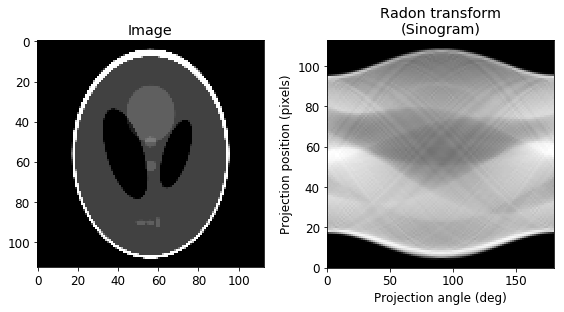

In [61]:
from skimage.io import imread
# from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = imread('SheppLogan_Phantom.png')
image = rescale(image, scale=0.2, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Image")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

In [62]:
I1=sinogram[:, 50]

In [63]:
N=len(I1)
x0 = np.linspace(0, 1, N)
I0= np.ones(N)
x=np.arange(N)

In [64]:
epsilon = 1e-7
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()

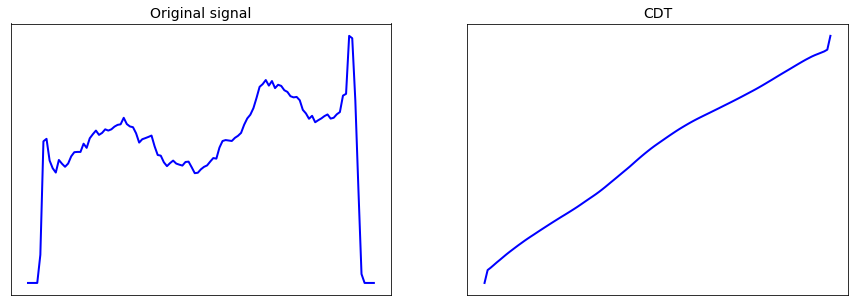

In [65]:
from optrans.continuous.cdt import CDT

# Create a CDT object
cdt = CDT()

# Compute the forward transform
I1_hat, f1_hat, xtilde = cdt.forward(x0, I0, x, I1, rm_edge=False)

# Plot I1 and I1_hat
fontSize=14
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,I1, 'b-',linewidth=2)
ax[0].set_title('Original signal',fontsize=fontSize)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(f1_hat, 'b-',linewidth=2)
ax[1].set_title('CDT',fontsize=fontSize)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

# Calculate DCT coefficients

Using DCT of image:

In [70]:
from scipy.fftpack import dct, idct

I_dct = dct(I1)

#nth_max = len(I_dct)
nth_max = 30  # select number of largest DCT coefficients to use

I_dct_ = I_dct.copy()
I_dct.sort()

lowVal = I_dct[-1*nth_max]
lowVal_flags = I_dct_ < lowVal
I_dct_[lowVal_flags] = 0

I_recon = idct(I_dct_)

Using DCT of CDT:

In [71]:
f1_hat_dct = dct(f1_hat)

f1_hat_dct_ = f1_hat_dct.copy()
f1_hat_dct.sort()

lowVal = f1_hat_dct[-1*nth_max]
lowVal_flags = f1_hat_dct_ < lowVal
f1_hat_dct_[lowVal_flags] = 0

f1_hat_recon = idct(f1_hat_dct_)
f1_hat_recon = f1_hat_recon*f1_hat.max()/f1_hat_recon.max()

I1_recon = cdt.inverse(f1_hat_recon, I0, x)

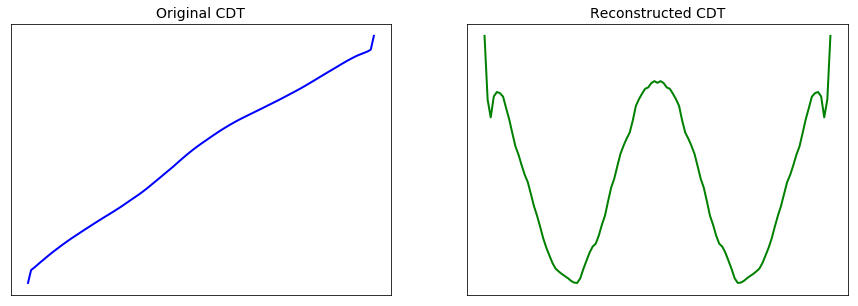

In [72]:
fontSize=14
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,f1_hat, 'b-',linewidth=2)
ax[0].set_title('Original CDT',fontsize=fontSize)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(abs(f1_hat_recon), 'g-',linewidth=2)
ax[1].set_title('Reconstructed CDT',fontsize=fontSize)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

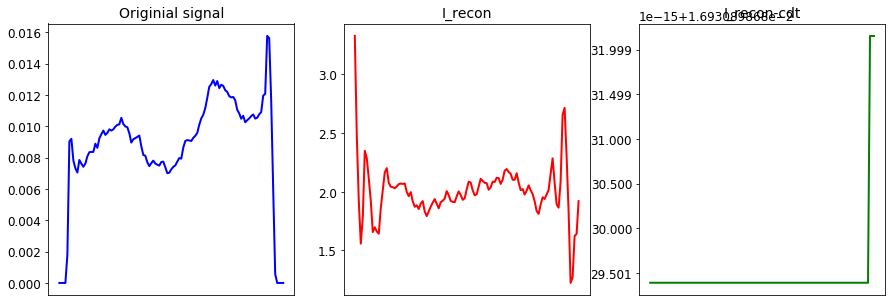

In [73]:

# Plot I_recon and I_hat_recon
fontSize=14
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,5))

ax[0].plot(x,I1, 'b-',linewidth=2)
ax[0].set_title('Originial signal',fontsize=fontSize)
ax[0].set_xticks([])
#ax[0].set_yticks([])

ax[1].plot(x,I_recon, 'r-',linewidth=2)
ax[1].set_title('I_recon',fontsize=fontSize)
ax[1].set_xticks([])
#ax[1].set_yticks([])

ax[2].plot(abs(I1_recon), 'g-',linewidth=2)
ax[2].set_title('I_recon-cdt',fontsize=fontSize)
ax[2].set_xticks([])
#ax[2].set_yticks([])

plt.show()